In [18]:
from dotenv import load_dotenv
import openai
import os
from openai import AzureOpenAI
from IPython.display import display, HTML, JSON, Markdown, Image
import base64 

load_dotenv()
#choose "gpt-4o-2024-08-06"
#the gpt-4o model in RG openai-pudq32pahhq7c is 2024-08-06 version
AZURE_OPENAI_ENDPOINT=os.getenv("AZURE_OPENAI_ENDPOINT")
AZURE_OPENAI_KEY=os.getenv("AZURE_OPENAI_KEY")
AZURE_OPENAI_API_VERSION=os.getenv("AZURE_OPENAI_API_VERSION")
AZURE_OPENAI_GPT4o_DEPLOYMENT=os.getenv("AZURE_OPENAI_GPT4o_DEPLOYMENT")


client = openai.AzureOpenAI(
        azure_endpoint=AZURE_OPENAI_ENDPOINT,
        api_key=AZURE_OPENAI_KEY,
        api_version=AZURE_OPENAI_API_VERSION
)

print(f"Model: {AZURE_OPENAI_GPT4o_DEPLOYMENT}; API Version:{AZURE_OPENAI_API_VERSION}")
print("Azure OpenAI model is ready to use!")

Model: gpt-4o; API Version:2024-10-21
Azure OpenAI model is ready to use!


In [19]:
from pydantic import BaseModel

class Brand(BaseModel):
    name: str
    confidence: float

In [20]:
import textwrap
#in order to use structured outputs of json format from openAI, we need to use gpt4o model versions here:
# https://learn.microsoft.com/en-us/azure/ai-services/openai/how-to/structured-outputs?tabs=python#supported-models

def call_openAI(text):
    response = client.beta.chat.completions.parse(
        model=AZURE_OPENAI_GPT4o_DEPLOYMENT,
        messages = text,
        temperature=0.0,
        response_format=Brand,
    )
    return response.choices[0].message.content

def prettyprint(text: str) -> str:
    print(textwrap.fill(text, 60))

In [21]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [ ]:
IMAGE_PATH = "./data/person_bottle.jpg"
base64_image = encode_image(IMAGE_PATH)
# Preview image for context
display(Image(IMAGE_PATH))

In [ ]:
messages=[
    {"role": "system", "content": """
     You are an expert identifying logos of known brands in images  that responds to users questions, 
     respond in json format as follows:
     {brand: "brand_name", logo: "logo_name", confidence: 0.9}
     if no brand was detected say "none"
     """},
    {"role": "user", "content": [
        {"type": "text", "text": "Are there any bundaberg logos in the picture?"},
        {"type": "image_url", "image_url": {
            "url": f"data:image/png;base64,{base64_image}"}
        }
    ]}
]

result = call_openAI(messages)
print(result)

In [ ]:
messages=[
    {"role": "system", "content": """
     You are an expert identifying logos of known brands in images  that responds to users questions, 
     respond in json format as follows:
     {brand: "brand_name", logo: "logo_name", confidence: 0.9}
     if no brand was detected say "none"
     """},
    {"role": "user", "content": [
        {"type": "text", "text": "Are there any remedy logos in the picture?"},
        {"type": "image_url", "image_url": {
            "url": f"data:image/png;base64,{base64_image}"}
        }
    ]}
]

result = call_openAI(messages)
print(result)

In [ ]:
IMAGE_PATH = "./data/people_bottles_r.jpg"
base64_image = encode_image(IMAGE_PATH)
# Preview image for context
display(Image(IMAGE_PATH))

In [ ]:

messages=[
    {"role": "system", "content": """
     You are an expert identifying logos of known brands in images  that responds to users questions, 
     respond in json format as follows:
     {brand: "brand_name", logo: "logo_name", confidence: 0.9}
     if no brand was detected say "none"
     """},
    {"role": "user", "content": [
        {"type": "text", "text": "Are there any remedy logos in the picture?"},
        {"type": "image_url", "image_url": {
            "url": f"data:image/png;base64,{base64_image}"}
        }
    ]}
]

result = call_openAI(messages)
print(result)

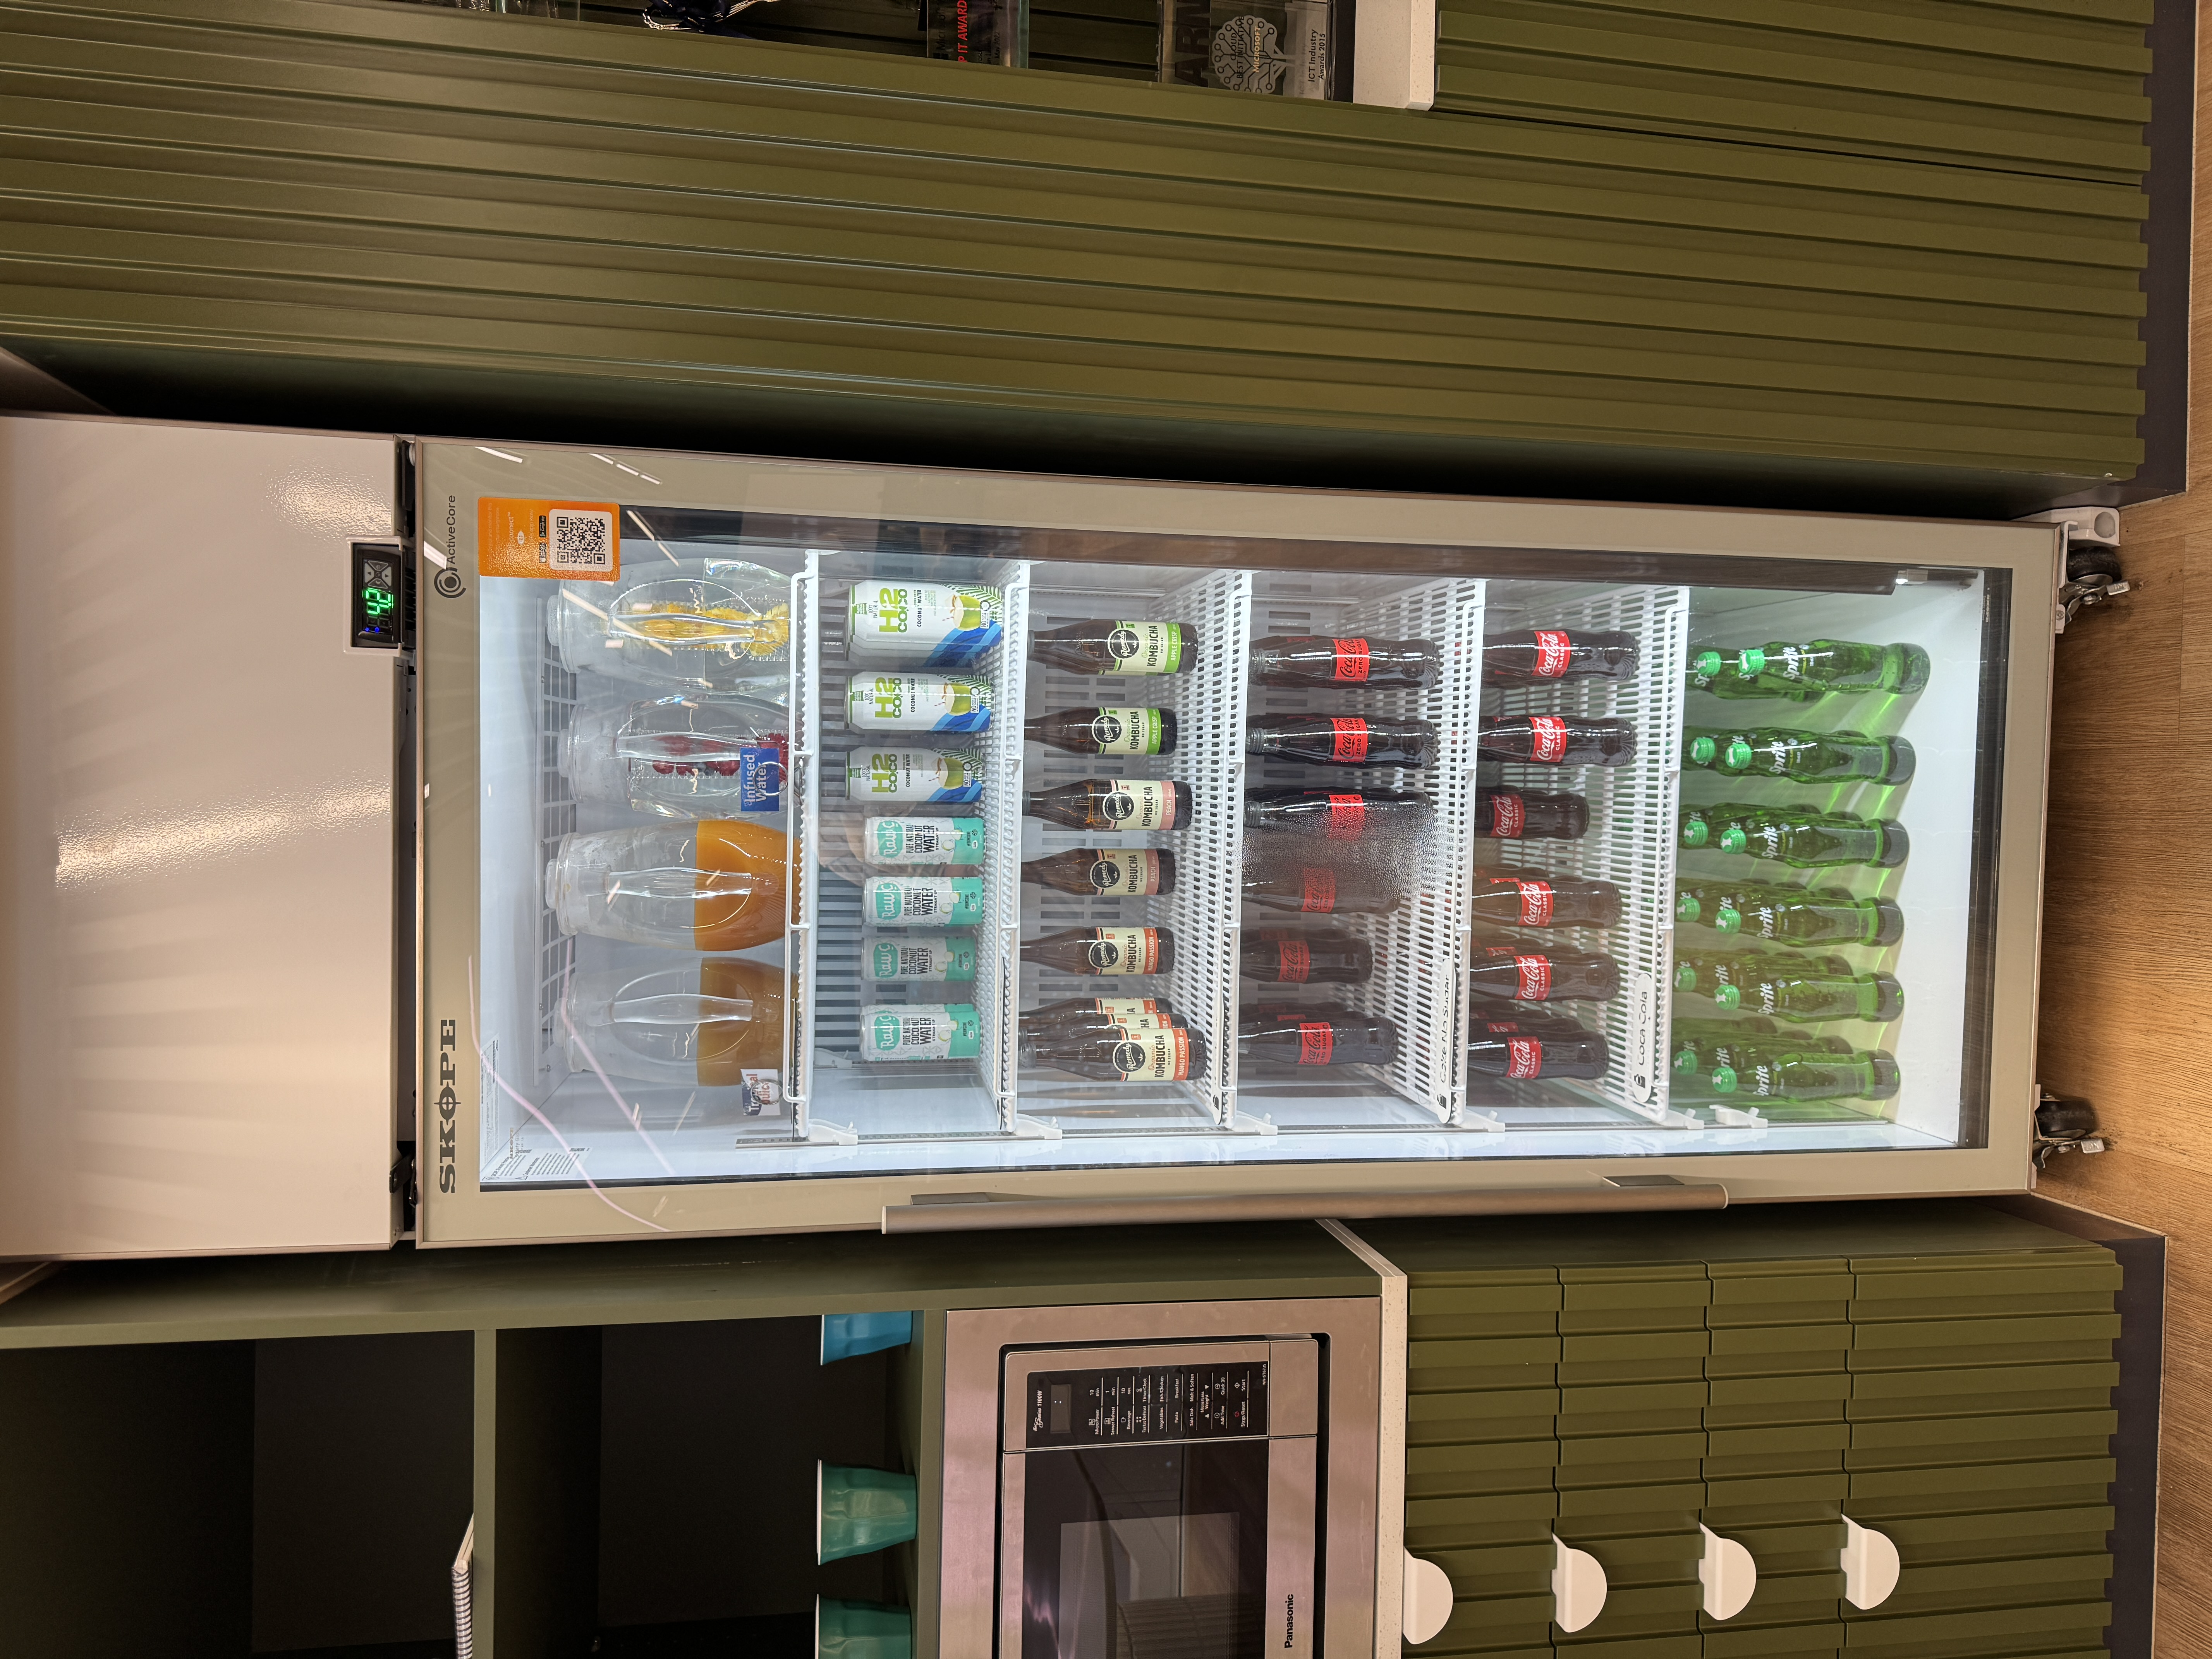

In [22]:
IMAGE_PATH = "./data/syd_fridge.jpeg"
base64_image = encode_image(IMAGE_PATH)
# Preview image for context
display(Image(IMAGE_PATH))

In [23]:
messages=[
    {"role": "system", "content": """
     You are an expert identifying logos of known brands in images  that responds to users questions, 
     respond in json format as follows:
     {brand: "brand_name", logo: "logo_name", confidence: 0.9}
     if no brand was detected say "none"
     """},
    {"role": "user", "content": [
        {"type": "text", "text": "Are there any remedy logos in the picture?"},
        {"type": "image_url", "image_url": {
            "url": f"data:image/png;base64,{base64_image}"}
        }
    ]}
]

result = call_openAI(messages)
print(result)

{"name":"Remedy","confidence":0.9}
